# Temperature Prediction

## Objective
Predict the **temperature** based on humidity data.


## Dataset Overview
The dataset contains hourly or daily readings of humidity and temperature.


## Workflow
1. Load the dataset  
2. Explore and clean the data  
3. Train a regression model  
4. Evaluate predictions


In [13]:
# Import required libraries
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
# Load the dataset
df=pd.read_csv("humidity.csv")
df.info()
df.head()


<class 'pandas.DataFrame'>
RangeIndex: 701548 entries, 0 to 701547
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   sensor_id    701548 non-null  int64  
 1   lat          701548 non-null  float64
 2   lon          701548 non-null  float64
 3   pressure     701548 non-null  float64
 4   temperature  701548 non-null  float64
 5   humidity     701548 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 32.1 MB


,sensor_id,lat,lon,pressure,temperature,humidity
0,2266,42.738,23.272,95270.27,23.46,62.48
1,2292,42.663,23.273,94355.83,23.06,59.46
2,3096,42.700,23.360,95155.81,26.53,44.38
3,3428,42.624,23.406,94679.57,28.34,38.28
4,3472,42.669,23.318,94327.88,26.31,46.37


## Exploratory Data Analysis


In [4]:
# Check for missing values

print(df.isnull().sum())

# Display summary statistics

print(df.describe())


sensor_id      0
lat            0
lon            0
pressure       0
temperature    0
humidity       0
dtype: int64
           sensor_id            lat            lon       pressure  \
count  701548.000000  701548.000000  701548.000000  701548.000000   
mean     2835.419842      42.679722      23.333739   94965.292500   
std       798.018890       0.025568       0.039365    2577.210945   
min      1764.000000      42.622000      23.240000       0.000000   
25%      2224.000000      42.665000      23.310000   94528.017500   
50%      2323.000000      42.685000      23.332000   95005.480000   
75%      3474.000000      42.694000      23.360000   95405.132500   
max      4661.000000      42.738000      23.419000  164926.750000   

         temperature       humidity  
count  701548.000000  701548.000000  
mean       24.754990      48.348949  
std        14.013001      20.907247  
min      -145.120000       0.000000  
25%        20.630000      34.140000  
50%        24.780000      48.350000

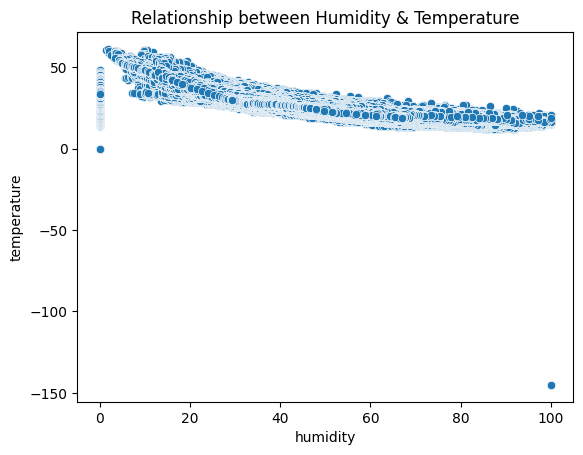

In [5]:
# Scatter plot to observe relationship
# A map of dots showing how temperature changes when humidity changes

sns.scatterplot(x='humidity', y='temperature', data=df)
plt.title("Relationship between Humidity & Temperature")
plt.show()



## Data Preprocessing

In [7]:
# Drop any rows with missing values

df = df.dropna()

# Define features and target

X = df[['humidity']]
y = df['temperature']

# Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Model Training

In [11]:
# Linear Regression

model = LinearRegression()

# Train the model using the training data

model.fit(X_train, y_train)

# Predict

y_pred = model.predict(X_test)

# First 5 guesses of the model prediction

y_pred[:5]

array([14.93681105, 32.06608596, 18.21935337, 23.49462409, 28.31265918])

## Evaluation


In [15]:
# Evaluate model performance

# Calculating the error & R-squared score

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

# Printing the results

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 144.08
R-squared Score: 0.26


## Conclusion
- A simple linear regression model was used to predict temperature from humidity.  
- Consider using polynomial regression or time-series models for more complex patterns.



1. **Model Performance:** I built a Linear Regression model that uses Humidity to predict Temperature.
2. **Findings:** The model achieved an R-squared score of 0.26. This confirms that there is a relationship between humidity and temperature (as humidity goes up, temperature tends to go down), but humidity is not the only factor.
3. **Accuracy:** On average, the model's predictions are within approximately 12 degrees of the actual temperature.
